[1]

In [11]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [12]:
class PCTrombone(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

In [50]:
low=  220
high= 440 
signal = PCTrombone(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [14]:
signal = PCTrombone(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [15]:
wave = wave1 | wave2  | wave2 | wave1 | wave1 | wave2  | wave2 | wave1
wave.make_audio()

In [57]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)

TypeError: slice indices must be integers or None or have an __index__ method

[2]

In [20]:
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x


In [21]:
x.ts, x.ys
x.ys.shape

(10000,)

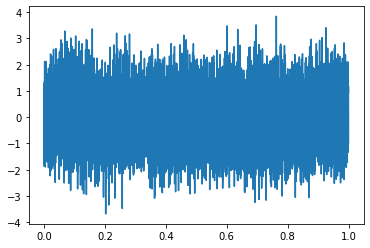

In [22]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [23]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.8443857831321235, -0.00393721499234294, 1.0064861432835828)

In [24]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

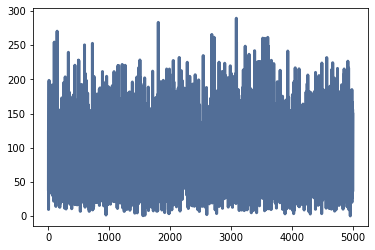

In [25]:
sx.plot()

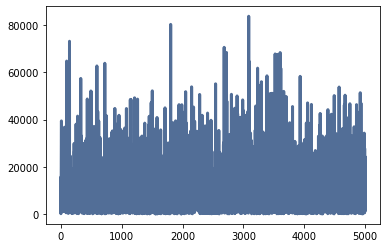

In [26]:
sx.plot_power()

In [27]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

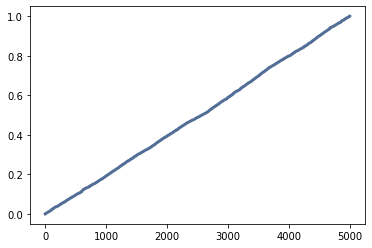

In [28]:
Sx.plot_power()

In [29]:
Sx.estimate_slope()

ValueError: Inputs must not be empty.

In [30]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

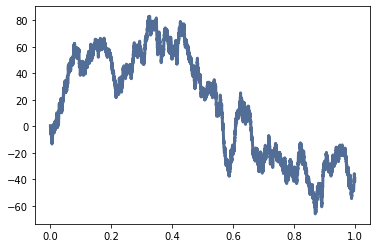

In [31]:
y.plot()

In [32]:
y.ys.max(), y.ys.mean(), y.ys.std()

(82.91378112169865, 15.202221450778172, 39.62648224478253)

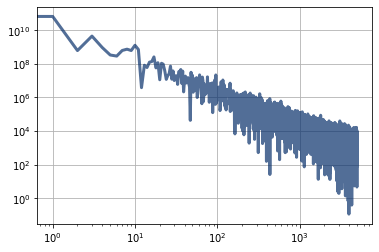

In [33]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

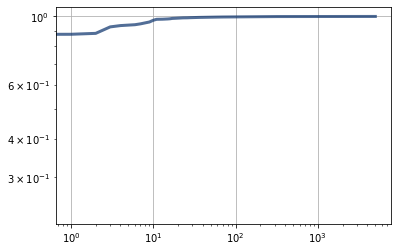

In [34]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [35]:
sy.make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

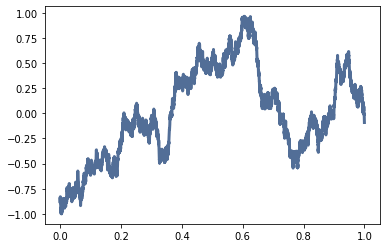

In [36]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [37]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

[3]

In [39]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [40]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


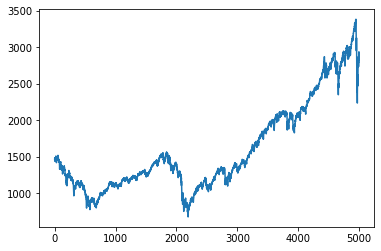

In [41]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [42]:
yWave= td.Wave(ys, framerate= 10000)

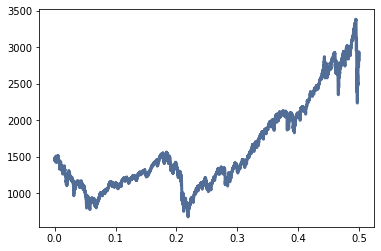

In [43]:
yWave.plot()

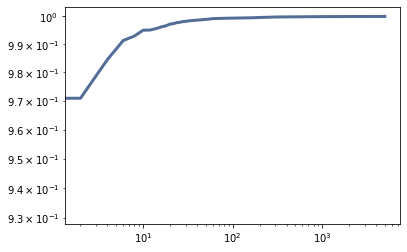

In [44]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

# integrated_spectrum 之 log-log slope= .0003 近似於 0，
# 因此 yWave 近似Brownian Noise